In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_image = pd.read_csv("../raw_data/sign_mnist_train.csv")
df_image_test = pd.read_csv("../raw_data/sign_mnist_test.csv")
df_image.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [2]:
df_image_test.shape

(7172, 785)

In [3]:
df_image.shape

(27455, 785)

In [4]:
df_image.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [5]:
df_image.duplicated().sum()

0

In [6]:
(df_image.isnull().sum().sort_values(ascending=False)/len(df_image)).value_counts()

0.0    785
dtype: int64

In [7]:
df_image.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [8]:
letter = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [9]:
len(letter)

24

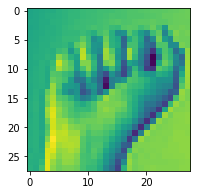

In [10]:
import random

df_image_np = np.array(df_image)

i = random.randint(1,df_image.shape[0])
fig1, ax1 = plt.subplots(figsize=(3,3))
plt.imshow(df_image_np[i,1:].reshape((28,28))) 

In [11]:
len(df_image_np[0])

785

In [12]:
X_train = np.array(df_image.drop(columns="label"), dtype = 'float32')
y_train = df_image["label"]
X_test = np.array(df_image_test.drop(columns="label"), dtype = 'float32')
y_test = df_image_test["label"]

In [13]:
y_train.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [14]:
letter.index("D")

3

In [15]:
y_train[145]

8

In [16]:
y_train.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [17]:
dict_letter = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 10:'K', 11:'L', 12:'M', 
               13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y' }


In [18]:
#i=0
#for i in range(0, len(y_train)):
#    y_train[i] = dict_letter[y_train[i]]

In [19]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [20]:
y_train.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [21]:
from tensorflow.keras.utils import to_categorical
X_train = X_train / 255.
X_test = X_test / 255.
X_train

2021-11-22 17:32:51.221742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 17:32:51.221807: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


array([[0.41960785, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607844,
        0.7921569 ],
       [0.60784316, 0.6156863 , 0.6117647 , ..., 0.40392157, 0.5294118 ,
        0.58431375],
       [0.73333335, 0.7372549 , 0.7372549 , ..., 0.7647059 , 0.7607843 ,
        0.7647059 ],
       ...,
       [0.68235296, 0.68235296, 0.68235296, ..., 0.7921569 , 0.78431374,
        0.78431374],
       [0.69411767, 0.70980394, 0.72156864, ..., 0.2509804 , 0.34117648,
        0.3647059 ],
       [0.7019608 , 0.7058824 , 0.7058824 , ..., 0.8039216 , 0.81960785,
        0.84313726]], dtype=float32)

In [22]:
y_train_cat = to_categorical(y_train, num_classes=25)
y_test_cat = to_categorical(y_test, num_classes=25)
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [23]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [24]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [25]:
X_train

array([[[[0.41960785],
         [0.4627451 ],
         [0.49803922],
         ...,
         [0.6666667 ],
         [0.6666667 ],
         [0.6627451 ]],

        [[0.43529412],
         [0.4745098 ],
         [0.5058824 ],
         ...,
         [0.67058825],
         [0.67058825],
         [0.6666667 ]],

        [[0.44313726],
         [0.48235294],
         [0.5137255 ],
         ...,
         [0.67058825],
         [0.67058825],
         [0.67058825]],

        ...,

        [[0.5568628 ],
         [0.5882353 ],
         [0.62352943],
         ...,
         [0.7921569 ],
         [0.7882353 ],
         [0.78431374]],

        [[0.5568628 ],
         [0.5921569 ],
         [0.627451  ],
         ...,
         [0.8       ],
         [0.79607844],
         [0.7921569 ]],

        [[0.5568628 ],
         [0.5921569 ],
         [0.627451  ],
         ...,
         [0.8       ],
         [0.79607844],
         [0.7921569 ]]],


       [[[0.60784316],
         [0.6156863 ],
         [0.61

In [26]:
X_train.shape

(27455, 28, 28, 1)

In [27]:
X_test.shape

(7172, 28, 28, 1)

In [28]:
y_train_cat.shape

(27455, 25)

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models

def initialize_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), padding='same', activation="relu", input_shape=(28,28,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3,3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    
    ### Flattening
    model.add(layers.Flatten())

    ### One fully connected
    model.add(layers.Dense(128, activation='relu')) # intermediate layer

    model.add(layers.Dense(25, activation='softmax'))

    return model

In [30]:
def compile_model(model):
    model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
    return model

In [31]:
X_train.shape

(27455, 28, 28, 1)

In [32]:
X_test.shape

(7172, 28, 28, 1)

In [33]:
y_train_cat.shape

(27455, 25)

In [34]:
y_test_cat.shape

(7172, 25)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()

model = compile_model(model)

es = EarlyStopping(patience = 2)

history = model.fit(X_train, y_train_cat,
          validation_split=0.3,
          epochs=15,  # Use early stop in practice
          batch_size=64, 
          verbose=1,
          callbacks=[es])

2021-11-22 17:32:53.137544: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-22 17:32:53.153709: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: UNKNOWN ERROR (100)
2021-11-22 17:32:53.153802: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MSI): /proc/driver/nvidia/version does not exist
2021-11-22 17:32:53.155335: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-22 17:32:53.306764: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 17:32:53.309368: I tensorflow/c

Epoch 1/15
301/301 [==============================] - 8s 26ms/step - loss: 0.9795 - accuracy: 0.7100 - val_loss: 9.2387 - val_accuracy: 0.0447
Epoch 2/15
301/301 [==============================] - 7s 24ms/step - loss: 0.0373 - accuracy: 0.9956 - val_loss: 0.3882 - val_accuracy: 0.8577
Epoch 3/15
301/301 [==============================] - 7s 24ms/step - loss: 0.0091 - accuracy: 0.9996 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 4/15
301/301 [==============================] - 7s 24ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/15
301/301 [==============================] - 7s 25ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.0046 - val_accuracy: 0.9996
Epoch 6/15
301/301 [==============================] - 7s 25ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0290 - val_accuracy: 0.9892


In [36]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

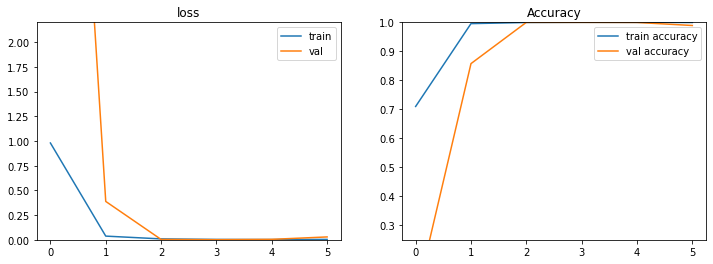

In [37]:
plot_history(history, title='', axs=None, exp_name="");

In [38]:
model.evaluate(X_test, y_test_cat)

225/225 [==============================] - 1s 4ms/step - loss: 0.2900 - accuracy: 0.9099


[0.2899787127971649, 0.909927487373352]

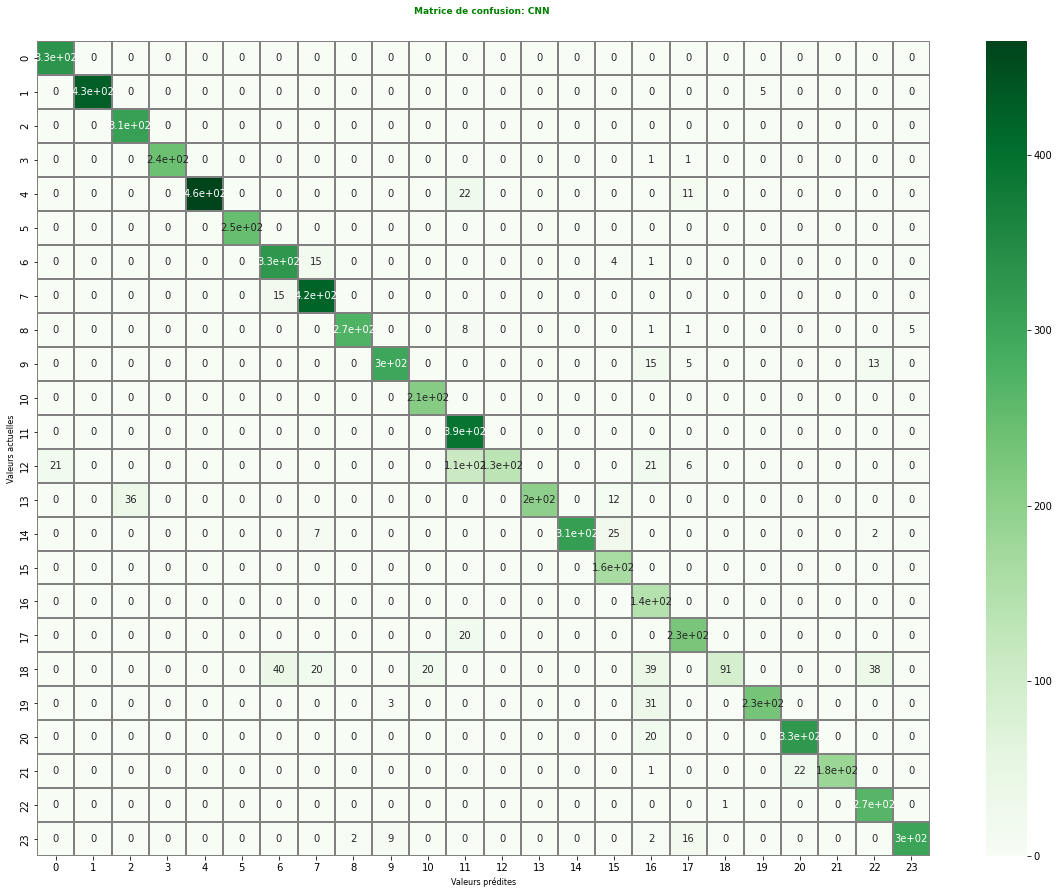

In [39]:
from sklearn import metrics
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_cat,axis = 1) 
# compute the confusion matrix
confusion_mtx = metrics.confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",ax=ax)
plt.xlabel("Valeurs prédites",size=8)
plt.ylabel("Valeurs actuelles",size=8)
plt.title('Matrice de confusion: CNN \n\n', weight='700',color='Green', size=9)
plt.show()